In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [3]:
#url information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

554
554
554
554
554
554
554
554
554


In [27]:
# set up lists to hold reponse info (Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), 
# city name, latitude, longitude, country, and date)
found_cities = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
longitude = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

#loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        found_cities.append(response["name"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {cities.index(city) + 1} of {len(cities)} | {city}")
    except:
        print(f"City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 611 | cabo san lucas
Processing Record 2 of 611 | tuatapere
Processing Record 3 of 611 | souillac
Processing Record 4 of 611 | mataura
Processing Record 5 of 611 | butaritari
Processing Record 6 of 611 | hami
Processing Record 7 of 611 | new norfolk
Processing Record 8 of 611 | hithadhoo
City not found. Skipping...
Processing Record 10 of 611 | avanigadda
Processing Record 11 of 611 | rikitea
Processing Record 12 of 611 | dumas
Processing Record 13 of 611 | hermanus
Processing Record 14 of 611 | tasiilaq
Processing Record 15 of 611 | albany
Processing Record 16 of 611 | kisangani
Processing Record 17 of 611 | makat
Processing Record 18 of 611 | busselton
Processing Record 19 of 611 | alofi
Processing Record 20 of 611 | longyearbyen
Processing Record 21 of 611 | barrow
Processing Record 22 of 611 | pisco
City not found. Skipping...
Processing Record 24 of 611 | punta arenas
Processing Record 25 of 611 | kyshto

In [38]:
cities_df = pd.DataFrame({"City": found_cities,
              "Lat": latitude,
              "Lng": longitude,
              "Max Temp": max_temp,
              "Humidity": humidity,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_speed,
              "Country": country,
              "Date": date})
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.89,-109.91,90.0,58,5,10.29,MX,1595027061
1,Tuatapere,-46.13,167.68,39.0,83,39,3.00,NZ,1595027191
2,Souillac,-20.52,57.52,69.8,73,40,11.41,MU,1595027191
3,Mataura,-46.19,168.86,39.0,83,0,3.00,NZ,1595027191
4,Butaritari,3.07,172.79,83.3,76,22,15.64,KI,1595027192


In [43]:
humidity_over_100 = cities_df.loc[cities_df["Humidity"] > 100]
humidity_over_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


No cities with humidity greater than 100%

In [45]:
#export dataframe to csv
cities_df.to_csv("Output/city_data.csv", index=False, header=True)

Temperature (F) vs. Latitude

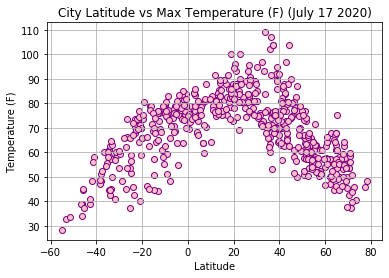

<Figure size 432x288 with 0 Axes>

In [52]:
# Plot out temperature(F) versus latitude
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]
plt.scatter(x_values,y_values, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Max Temperature (F) (July 17 2020)")
plt.grid()
plt.savefig("Images/temp_lat.png")
plt.show()

Humidity (%) vs. Latitude

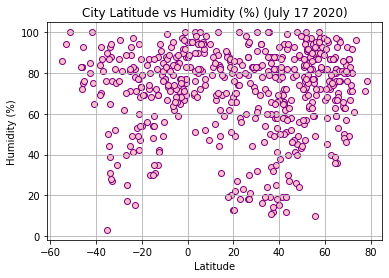

In [58]:
# Plot out humidity(%) versus latitude
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]
plt.scatter(x_values,y_values, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%) (July 17 2020)")
plt.grid()
plt.savefig("Images/humidity_lat.png")
plt.show()

Cloudiness (%) vs. Latitude

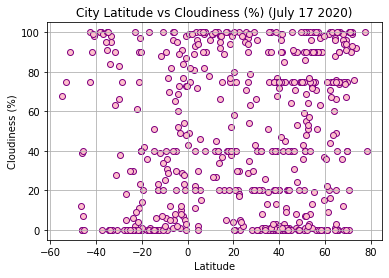

In [57]:
# Plot out cloudiness(%) versus latitude
x_values = cities_df["Lat"]
y_values = cities_df["Cloudiness"]
plt.scatter(x_values,y_values, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%) (July 17 2020)")
plt.grid()
plt.savefig("Images/cloudiness_lat.png")
plt.show()

Wind Speed (mph) vs. Latitude

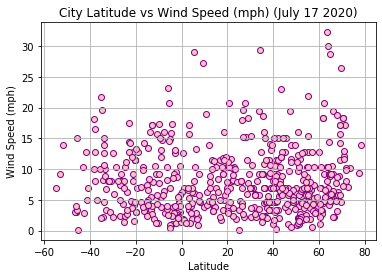

In [60]:
# Plot out wind speed (mph) versus latitude
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]
plt.scatter(x_values,y_values, color="pink", edgecolors="purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (mph) (July 17 2020)")
plt.grid()
plt.savefig("Images/windspeed_lat.png")
plt.show()